<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>
# Worksheet S4: Procesamiento de textos

## Objetivos

El objetivo de este worksheet es que aprendas las principales operaciones para el manejo de textos. Entre otros:

* Operaciones de tratamiento de textos
* Uso de NLTK
* Modelo Bag of Words

## Instalación de paquetes necesarios

In [1]:
import sys
# !{sys.executable} -m pip install numpy pandas
!{sys.executable} -m pip install nltk sklearn scipy wordcloud

  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434678 sha256=7b220cf275c5368ccd343d81e825c991ebd24ac55ef4e85a4a5e44b8c7cc1f87
  Stored in directory: c:\users\gcabreram\appdata\local\pip\cache\wheels\45\6c\46\a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=787c898cf441d513626161cd038a150399a654df60e58959b530acb561f466b1
  Stored in directory: c:\users\gcabreram\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built nltk sklearn


## Carga de datos

Como otras veces vamos a importar los datos de un fichero csv, utilizaremos la función read_csv que nos proporciona la libreria de pandas para cargar una base de datos de usuarios. El dataset en cuestión consiste en mensajes SMS, etiquetados como spam o como no spam.

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 175) # incrementamos ancho de output
df = pd.read_csv("./data/spam_train.csv")
df.head()

,label,text
0,spam,"To review and KEEP the fantastic Nokia N-Gage game deck with Club Nokia, go 2 www.cnupdates.com/newsletter. unsubscribe from alerts reply with the word OUT"
1,ham,Just got outta class gonna go gym.
2,ham,Is there coming friday is leave for pongal?do you get any news from your work place.
3,ham,Hi Dear Call me its urgnt. I don't know whats your problem. You don't want to work or if you have any other problem at least tell me. Wating for your reply.
4,ham,"My friend just got here and says he's upping his order by a few grams (he's got $ &lt;#&gt; ), when can you get here?"


Una vez cargados los datos debemos inspeccionarlos, antes de empezar nuestro análisis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3900 non-null   object
 1   text    3900 non-null   object
dtypes: object(2)
memory usage: 61.1+ KB


## Columnas que contienen textos

También podemos acceder a funciones de procesamiento de textos con la propiedad `str`. Se puede consultar en https://pandas.pydata.org/pandas-docs/stable/api.html#string-handling todas las opciones disponibles. 

Nosotros revisaremos en este worksheet una par de ellas muy frecuentes. Con `contains` podemos quedarnos con todas las cadenas que contienen otra dada.

In [7]:
df['text'].str.contains('love').value_counts()

False    3781
True      119
Name: text, dtype: int64

Las máscaras se pueden aplicar de forma combinada utilizando operadores binarios. Por ejemplo para combinar (AND) dos máscaras a la vez:

In [8]:
df_mask_spam = (df['text'].str.contains('Congratulations') & df['label'].str.contains("spam"))

In [9]:
df[df_mask_spam].head(3)

,label,text
94,spam,"Congratulations! Thanks to a good friend U have WON the å£2,000 Xmas prize. 2 claim is easy, just call 08718726971 NOW! Only 10p per minute. BT-national-rate."
115,spam,Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16
480,spam,"Congratulations! Thanks to a good friend U have WON the å£2,000 Xmas prize. 2 claim is easy, just call 08718726978 NOW! Only 10p per minute. BT-national-rate"


# Transformaciones de texto
Algunas funciones que son interesantes son:

* `upper`: convierte el texto a mayúsculas
* `lower`: convierte el texto a minúsculas
* `replace`: reemplaza todas las ocurrencias de una cadena por otra

In [10]:
df.loc[df_mask_spam, 'text'].str.lower().head(3).to_frame() #'to_frame()' es para que muestre la Series en formato dataFrame 
# el '.loc' y text' es para escoger solo la columna (de ahí que sea un Series)
#http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.loc.html

,text
94,"congratulations! thanks to a good friend u have won the å£2,000 xmas prize. 2 claim is easy, just call 08718726971 now! only 10p per minute. bt-national-rate."
115,congratulations ur awarded 500 of cd vouchers or 125gift guaranteed & free entry 2 100 wkly draw txt music to 87066 tncs www.ldew.com1win150ppmx3age16
480,"congratulations! thanks to a good friend u have won the å£2,000 xmas prize. 2 claim is easy, just call 08718726978 now! only 10p per minute. bt-national-rate"


In [11]:
df.loc[df_mask_spam, 'text'].str.replace("Congratulations", "Vaya timo").head(3).to_frame()

,text
94,"Vaya timo! Thanks to a good friend U have WON the å£2,000 Xmas prize. 2 claim is easy, just call 08718726971 NOW! Only 10p per minute. BT-national-rate."
115,Vaya timo ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16
480,"Vaya timo! Thanks to a good friend U have WON the å£2,000 Xmas prize. 2 claim is easy, just call 08718726978 NOW! Only 10p per minute. BT-national-rate"


Como hemos visto anteriormente, la función apply la podemos seguir aplicando sobre columnas de texto:

In [12]:
def convierte_texto(value):
    return value.replace("Congratulations", "Parece SPAM")

df.loc[df_mask_spam, 'text'].apply(convierte_texto).head(3).to_frame()

,text
94,"Parece SPAM! Thanks to a good friend U have WON the å£2,000 Xmas prize. 2 claim is easy, just call 08718726971 NOW! Only 10p per minute. BT-national-rate."
115,Parece SPAM ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16
480,"Parece SPAM! Thanks to a good friend U have WON the å£2,000 Xmas prize. 2 claim is easy, just call 08718726978 NOW! Only 10p per minute. BT-national-rate"


Una función muy útil es `map`, que nos permite "mapear" un diccionario con los valores de una columna:

In [13]:
binario = {'ham': 0, 'spam': 1}
df['label'].map(binario).head()

0    1
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## NLTK

NLTK (Natural Language Toolkit) es una biblioteca de Procesamiento de Lenguaje Natural para Python. El procesamiento de lenguaje natural es un área de la inteligencia artificial que desarrolla modelos capaces de comprender y generar texto en lenguaje natural.

Podemos inicializar NLTK de la siguiente manera:

In [14]:
import nltk
from nltk.metrics.distance import edit_distance
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import ne_chunk, pos_tag

NLTK no es un paquete normal, en el sentido de que con instalar el paquete no es suficiente. Para que funcione nltk es preciso descargar algunos componentes que incluyen soporte para varios idiomas, para ello utilizaremos el siguiente comando y se nos abrirá una ventana en la que podemos descargar varios paquetes.

Nos descargaremos la colección "book" y una vez descargados los requisitos necesarios e inicializado NLTK, vamos a cargar un texto con el que trabajar. Es importante que cuando se termine de descargar el paquete.

In [15]:
#nltk.download() # Puede que está línea esté comentada, descoméntala y ejecutala ;-)

### Distancia de Levenshtein

La distancia de Levenshtein mide la diferencia entre dos cadenas de texto. Esta distancia se mide por la cantidad de cambios que hay que hacerle a uno de los textos para que sea exactamente igual al otro. Una de las técnicas implicadas detrás del _"Quizás quisiste decir..."_ en las búsquedas de Google.

In [18]:
edit_distance("Bananas", "bananas")

1

*Mi nota: en este caso la distancia es únicamente letra a letra, pero en otros casos como Google utiliza también otras técnicas para recomendar el 'quizás quieres decir'*

### Tokenización

Uno de los pasos habituales al trabajar con texto es el de fragmentarlo. NLTK puede fragmentar en frases o sentencias con `sent_tokenize` o en palabras o términos con `word_tokenize`. En el caso de la tokenización en frases, NLKT tiene cierta inteligencia basada en reglas idiomáticas y por ejemplo, no dividirá en dos frases la cadena "Mr. President" por contener un punto.

In [19]:
text = df.loc[180, 'text']  #localiza el texto con 'id' = 180
text

"Sad story of a Man - Last week was my b'day. My Wife did'nt wish me. My Parents forgot n so did my Kids . I went to work. Even my Colleagues did not wish. As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there. She said,'' do u mind if I go into the bedroom for a minute ? '' ''OK'', I sed in a sexy mood. She came out 5 minuts latr wid a cake...n My Wife, My Parents, My Kidz, My Friends n My Colleagues. All screaming.. SURPRISE !! and I was waiting on the sofa.. ... ..... ' NAKED...!"

In [20]:
frases = sent_tokenize(text)
for i in frases:
    print(i)

Sad story of a Man - Last week was my b'day.
My Wife did'nt wish me.
My Parents forgot n so did my Kids .
I went to work.
Even my Colleagues did not wish.
As I entered my cabin my PA said, '' Happy B'day Boss !!''.
I felt special.
She askd me 4 lunch.
After lunch she invited me to her apartment.
We went there.
She said,'' do u mind if I go into the bedroom for a minute ? ''
''OK'', I sed in a sexy mood.
She came out 5 minuts latr wid a cake...n My Wife, My Parents, My Kidz, My Friends n My Colleagues.
All screaming..
SURPRISE !!
and I was waiting on the sofa.. ... ..... ' NAKED...!


### Tokenización en palabras

El siguiente paso natural es la descomposición de las frases en palabras. Para ello usaremos la función `word_tokenize`:

In [21]:
palabras = word_tokenize("RT @JRehling: #GOPDebate Donald Trump says that he doesn't have time for political correctness.")
print(palabras)

['RT', '@', 'JRehling', ':', '#', 'GOPDebate', 'Donald', 'Trump', 'says', 'that', 'he', 'does', "n't", 'have', 'time', 'for', 'political', 'correctness', '.']


*Mi nota: el problema con esto es que está separando tb signos de puntuación, '@', etc*

En este caso existen variantes, también en NLTK que están enfocadas a problemas concretos. Por ejemplo, uno centrado en la plataforma Twitter y que entiende y tokeniza correctamente convenciones comunes como los _#hashtags_, _RTweets_, _@menciones_...

In [22]:
from nltk.tokenize.casual import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
tweet_tokenizer.tokenize("RT @JRehling: #GOPDebate Donald Trump says that he doesn't have time for political correctness.")

['RT',
 '@JRehling',
 ':',
 '#GOPDebate',
 'Donald',
 'Trump',
 'says',
 'that',
 'he',
 "doesn't",
 'have',
 'time',
 'for',
 'political',
 'correctness',
 '.']

### Identificación de palabras
Una vez separado el texto en palabras, podemos analizar el significado de cada palabra. Para ello NLTK maneja un concepto que es "part of speech" que es el tipo de cada palabra. 

NLTK dispone de un identificador de palabras, que cataloga cada palabra en una categoría (Adjetivo, Verbo, etc..). Puedes consultar en https://cs.nyu.edu/grishman/jet/guide/PennPOS.html los tipos de tipos de palabras que existen.

Para hacer la descomposición de palabras, en NLTK, usaremos la función `pos_tag`:

*Según el objetivo de nuestro estudio, podemos buscar ciertos tipos de palabras (tipos listados en el link)*

In [25]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gcabreram\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [26]:
palabras = tweet_tokenizer.tokenize("RT @JRehling: #GOPDebate Donald Trump says that he doesn't have time for political correctness.")
pos = pos_tag(palabras)
print(pos)

[('RT', 'NNP'), ('@JRehling', 'NN'), (':', ':'), ('#GOPDebate', 'NN'), ('Donald', 'NNP'), ('Trump', 'NNP'), ('says', 'VBZ'), ('that', 'IN'), ('he', 'PRP'), ("doesn't", 'VBZ'), ('have', 'VBP'), ('time', 'NN'), ('for', 'IN'), ('political', 'JJ'), ('correctness', 'NN'), ('.', '.')]


Esto es útil, por si nos queremos quedar con todos los adjetivos de un texto, lo podemos hacer de la siguiente manera:

In [27]:
for frase in frases:    
    palabras = word_tokenize(frase)
    for pos in pos_tag(palabras):
        if pos[1].startswith('JJ'):
            print(pos)

('Last', 'JJ')
('wish', 'JJ')
('Happy', 'JJ')
('special', 'JJ')
('sexy', 'JJ')
('latr', 'JJ')
('n', 'JJ')
('n', 'JJ')


### Frecuencia de palabras

Otra aplicación bastante habitual cuando trabajamos con textos es medir la frecuencia de aparición de cada una de las palabras. Estudiando las frecuencia de aparición de las palabras podemos catalogar y comparar textos. Podemos mostrar un conteo de las palabras, o podemos utilizar una herramienta muy intuitiva llamada WordClouds.

Para ello, usaremos nuestro dataset, solo que primero concatenando todos los textos en uno.

In [29]:
df['text']

0        To review and KEEP the fantastic Nokia N-Gage game deck with Club Nokia, go 2 www.cnupdates.com/newsletter. unsubscribe from alerts reply with the word OUT
1                                                                                                                                 Just got outta class gonna go gym.
2                                                                               Is there coming friday is leave for pongal?do you get any news from your work place.
3       Hi Dear Call me its urgnt. I don't know whats your problem. You don't want to work or if you have any other problem at least tell me. Wating for your reply.
4                                              My friend just got here and says he's upping his order by a few grams (he's got $ &lt;#&gt; ), when can you get here?
                                                                                    ...                                                                             
3895      

In [30]:
mensajes = df['text'].str.cat(sep=' ')
print(mensajes[:500] + " ...")

To review and KEEP the fantastic Nokia N-Gage game deck with Club Nokia, go 2 www.cnupdates.com/newsletter. unsubscribe from alerts reply with the word OUT Just got outta class gonna go gym. Is there coming friday is leave for pongal?do you get any news from your work place. Hi Dear Call me its urgnt. I don't know whats your problem. You don't want to work or if you have any other problem at least tell me. Wating for your reply. My friend just got here and says he's upping his order by a few gra ...


In [36]:
mensajes[100:200]

'letter. unsubscribe from alerts reply with the word OUT Just got outta class gonna go gym. Is there '

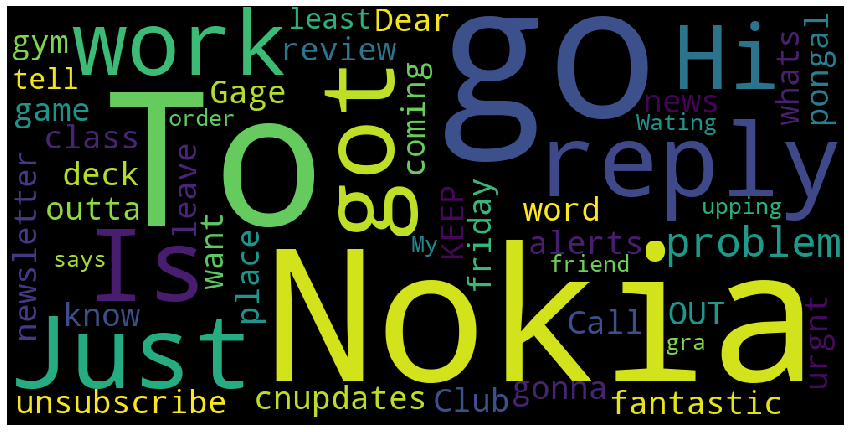

In [37]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500).generate(mensajes[:500]) #mensajes)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

También podemos analizar la frecuencia primero tokenizando por palabras:

In [38]:
palabras = word_tokenize(mensajes)
print(str(palabras[0:8]) + " ...")

['To', 'review', 'and', 'KEEP', 'the', 'fantastic', 'Nokia', 'N-Gage'] ...


Ahora con la función `FreqDist` y pasándole como parámetro las palabras en una lista podemos calcular la tabla de frecuencias de las palabras:

In [39]:
from nltk.probability import FreqDist

fdist = FreqDist(palabras)
fdist.most_common(10)

[('.', 3339),
 ('to', 1547),
 ('I', 1376),
 (',', 1291),
 ('you', 1268),
 ('?', 1104),
 ('!', 986),
 ('a', 912),
 ('the', 818),
 ('...', 811)]

*Mi nota: este tipo de caracteres/palabras muchas veces sobran, podemos quitarlas*

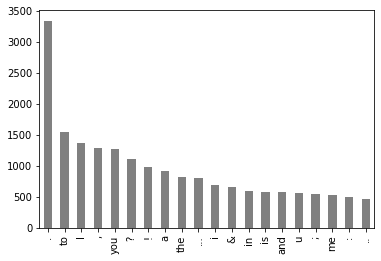

In [42]:
pd.Series(palabras).value_counts()[:20].plot(kind="bar", color = "gray")

Como podemos ver el resultado contiene muchas palabras que sirven de unión entre elementos, entre ellas pronombres o preposiciones. Estas palabras se denominan en nltk `stopwords`. NLTK dispone de una lista de stopwords en varios idiomas a las que podemos acceder con:

In [43]:
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
print(str(stopwords[:40]) + " ...")

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay'] ...


Ahora lo que haremos es filtrar esas palabras junto a los símbolos de puntuación para poder quedarnos con palabras que más nos ayuden a describir el texto. También eliminaremos palabras de menos de tres letras.

In [50]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')
print(str(eng_stopwords[:40]) + " ...")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this'] ...


In [51]:
palabras_filtradas = []
separadores = [',', '.', ';', ':', '?', '¿', '!', '¡', '...']
for palabra in palabras:
    palabra = palabra.lower()
    if palabra in eng_stopwords:
        pass
    elif palabra in separadores:
        pass
    elif len(palabra) < 3:  
        pass
    elif "'" in palabra and len(palabra) == 3:
        pass
    else:
        palabras_filtradas.append(palabra)
print("Palabras originales: " + str(len(palabras)))
print("Palabras originales filtradas:  " + str(len(palabras_filtradas)))

Palabras originales: 72591
Palabras originales filtradas:  31573


In [52]:
fdist = FreqDist(palabras_filtradas)
fdist.most_common(5)

[('call', 391), ('get', 273), ('free', 205), ('know', 179), ('got', 167)]

*Mi nota: vemos las frecuencias cambiadas*

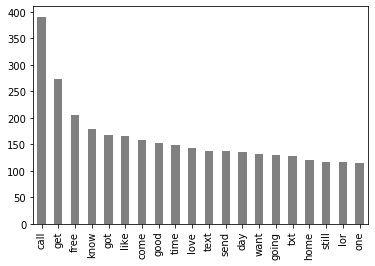

In [54]:
pd.Series(palabras_filtradas).value_counts()[:20].plot(kind="bar", color = "gray")

## Stemmización
La stemmización es un proceso que nos permite obtener la raíz de las palabras de manera que podamos comparar independiente de sus formas verbales o sus derivaciones. Los algoritmos de stemmización son heurísticos, es decir que producen un resultado aproximado. No existen algoritmos de stemmización perfectos, pues el lenguaje es algo vivo.

Para poder realizar una stemmización con NLTK haremos uso del stemmizador `SnowballStemmer` que instanciaremos de la siguiente manera:

In [55]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

Por ejemplo la raíz de 'habló' y la de 'hablar' es la misma: 'habl'

*Mi nota: entiendo que esto es interesante cuando no te importa perder info de tiempo verbal, singular/plural, etc*

In [56]:
stemmer.stem("learning")

'learn'

In [57]:
stemmer.stem("learned")

'learn'

Gracias a esta técnica, podemos refinar aún más el análisis de frecuencias anterior:

In [58]:
palabras_stem = []
for palabra in palabras_filtradas:
    palabras_stem.append(stemmer.stem(palabra))

In [60]:
fdist = FreqDist(palabras_stem)
fdist.most_common(5)

[('call', 442), ('get', 318), ('come', 206), ('free', 205), ('know', 187)]

Como se puede observar, _call_ ahora tiene una frecuencia de 440 y _get_ de 318. Esto es nuestro stemmer ha encontrado muchas más palabras cuya raíz es _call_. Lo mismo ocurre con _get_.

## Clasificación de texto con Bag of Words

*Mi nota: bag of words https://classroom.udacity.com/courses/ud120/lessons/2892378590/concepts/30374085950923 *

_Bag of Words_ es una de las técnicas más utilizadas e intuitivas en clasificación de texto. Un uso habitual sería el de identificar si un email es un mensaje de SPAM o no. _Bag of Words_ no es más que enumerar la incidencia de aparición de cada palabra en cada documento. Con esto, construimos una matriz documento-término donde los documentos serán las filas y los términos - que pueden ser palabras o tokens formados por varias palabras - aparecen representados.

Supongamos que tenemos los siguientes documentos:
    * "Mario y Súper Mario me enseñaron binary search"
    * "Me flipa binary search"

Obtenemos la bolsa de palabras:
    * "Mario", "y", "Súper", "me", "enseñaron", "binary", "search", "flipa"

Y la matriz documento-término:
![image.png](attachment:image.png)

## Mi nota: no usa bag of words para el clasificador??

In [63]:
len(palabras_stem)

31573

Ahora construiremos la matriz con Python y SKLearn.

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['text'])
X_train_counts.shape

(3900, 7206)

In [81]:
df.loc[:4, 'text']

0     To review and KEEP the fantastic Nokia N-Gage game deck with Club Nokia, go 2 www.cnupdates.com/newsletter. unsubscribe from alerts reply with the word OUT
1                                                                                                                              Just got outta class gonna go gym.
2                                                                            Is there coming friday is leave for pongal?do you get any news from your work place.
3    Hi Dear Call me its urgnt. I don't know whats your problem. You don't want to work or if you have any other problem at least tell me. Wating for your reply.
4                                           My friend just got here and says he's upping his order by a few grams (he's got $ &lt;#&gt; ), when can you get here?
Name: text, dtype: object

In [83]:
# mío
X_train_counts.toarray()[:4, :20]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

Como vemos, la matriz resultante tiene 3900 filas y 7206 columnas. Esto es, tenemos tantas filas como documentos o tweets teníamos previamente, y tantas columnas como términos ha extraído sklearn. Hay que tener en cuenta que a sklearn podemos indicarle qué toma como término. En nuestro caso es una palabra, pero podrían ser dos si lo especificamos con el parámetro ```ngram_range``` a nuestro ```CountVectorizer```. Podemos ver qué palabras se han obtenido de la siguiente forma:

In [87]:
print(count_vect.get_feature_names()[:20])

['00', '000', '000pes', '008704050406', '0089', '0121', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '03', '04', '0430', '05', '050703', '0578', '06', '07']


Ahora entrenaremos nuestro clasificador. Para ello, le daremos nuestra matriz documento-término, donde cada fila es un documento y además, la clase que conocemos de ese documento.

In [88]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_counts, df['label'])

*Mi nota: lo que se ha preprocesado es las features, ahora almacenadas en X_train_counts; las labels están en df['label'] que no están modificadas claro*

Finalmente vamos a evaluar este clasificador con datos que no hemos visto previamente. Tenemos otro archivo llamado "spam_test" que contiene otros mensajes de SPAM que NO ha visto nuestro clasificador. Vamos pues a pedirle a nuestro clasificador que viendo la matriz documento-término de estos mensajes de test, intente averiguar si es spam o no.

In [89]:
# leemos el archivo de texto test
df_test = pd.read_csv("./data/spam_test.csv")

# matriz documento-término de mensajes test
X_test_counts = count_vect.transform(df_test['text'])

# generamos las predicciones con la matriz
predicted = clf.predict(X_test_counts)

Finalmente, evaluamos nuestro clasificador:

In [91]:
right_pred_mask = predicted == df_test['label']
right_pred_mask

0       True
1       True
2       True
3       True
4       True
        ... 
1667    True
1668    True
1669    True
1670    True
1671    True
Name: label, Length: 1672, dtype: bool

In [92]:
np.mean(right_pred_mask)

0.9820574162679426

## Quizz

* ¿Crees que el procesamiento de lenguaje natural (PLN) es una tarea fácil o díficil para un ordenador?
* ¿Cuales crees que son los principales problemas de trabajar con Bag of Words y matrices documento-término?
* ¿En qué nos pueden ayudar las técnicas que hemos aprendido a la hora de trabajar con Bag of Words?

## Mío: re-entreno añadiendo a 'CountVectorizer' algún param. para afinar la extracción de atributos:

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(df['text'])
X_train_counts.shape

(3900, 6946)

In [100]:
X_test_counts = count_vect.transform(df_test['text'])
#CLASSIFIER
clf = MultinomialNB().fit(X_train_counts, df['label'])

# generamos las predicciones con la matriz
predicted = clf.predict(X_test_counts)

In [101]:
right_pred_mask = predicted == df_test['label']
np.mean(right_pred_mask)


0.9832535885167464

## Ha mejorado un una milésima al eliminar stopwords; qué ocurre si además tokenizamos con cada 2 palabras en lugar de una?

Del libro Python Machine Learning: <p>
1-gram: "the", "sun", "is", "shining" <p>
2-gram: "the sun", "sun is", "is shining"

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english', ngram_range=(2, 2))
X_train_counts = count_vect.fit_transform(df['text'])
X_test_counts = count_vect.transform(df_test['text'])
#CLASSIFIER
clf = MultinomialNB().fit(X_train_counts, df['label'])
# generamos las predicciones con la matriz
predicted = clf.predict(X_test_counts)
right_pred_mask = predicted == df_test['label']
np.mean(right_pred_mask)

0.9802631578947368